In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sea
sea.set()

In [3]:
iris_raw = pd.read_csv('iris_dataset.csv')
iris_raw.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_raw.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


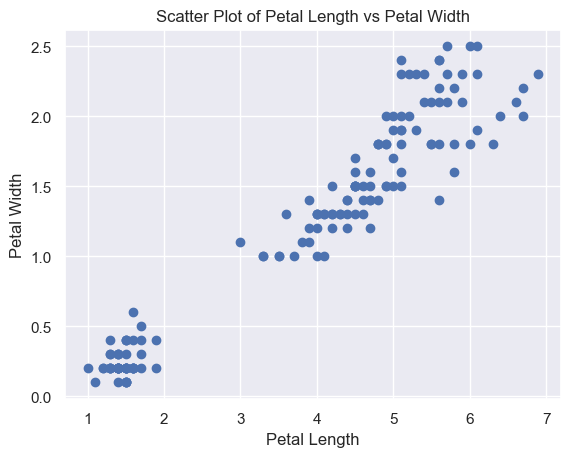

In [5]:
plt.scatter(iris_raw['petal_length'], iris_raw['petal_width'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.show()

In [6]:
# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris_raw)

In [27]:
scaled_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## K = 2

In [19]:
class2 = iris_raw.copy()

k2 = KMeans(2)

k2.fit(scaled_data)

KMeans(n_clusters=2)

In [20]:
class2['cluster_pred'] = k2.fit_predict(scaled_data)

class2

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


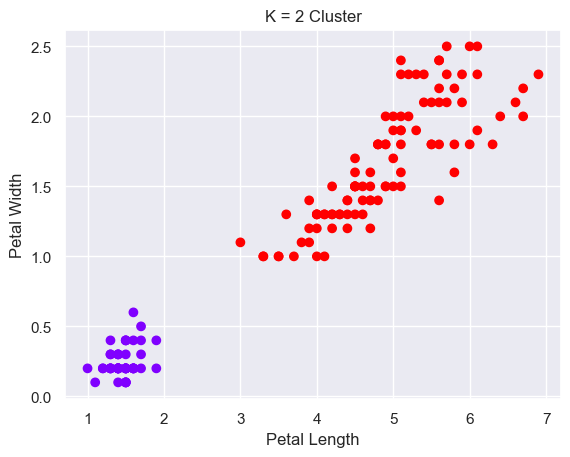

In [21]:
plt.scatter(class2['petal_length'], class2['petal_width'],
            c=class2['cluster_pred'], cmap='rainbow')
plt.title('K = 2 Cluster')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


## K = 3

In [ ]:
class3 = iris_raw.copy()

k3 = KMeans(3, random_state=42)

k3.fit(scaled_data)

KMeans(n_clusters=3)

In [28]:
k3.inertia_

140.96581663074699

In [26]:
x = iris_raw[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_raw['cluster_pred']

KeyError: 'cluster_pred'

In [23]:
class3['cluster_pred'] = k3.fit_predict(scaled_data)

class3

,sepal_length,sepal_width,petal_length,petal_width,cluster_pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
class3_with_clusters = np.column_stack((X_with_clusters, cluster_labels))


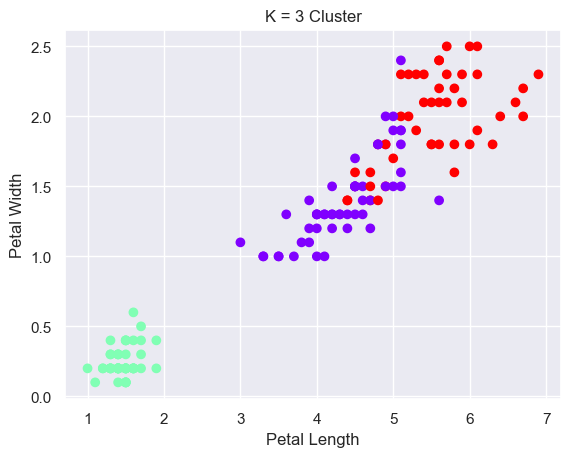

In [24]:
plt.scatter(class3['petal_length'], class3['petal_width'],
            c=class3['cluster_pred'], cmap='rainbow')
plt.title('K = 3 Cluster')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


### K = 3 的分類結果比較好，所以另存一個 csv filw with predict values。

In [29]:
class3.to_csv('Iris_Class_3.csv', encoding='utf-8-sig', index=False)
